### 1.Dataset

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over
4,000 TED talks including transcripts in many languages.
Founded in 1984 by Richard Salman as a nonprofit organization
that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all
walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000
talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,
Jimmy Wales, Shahrukh Khan, and Bill Gates.
The main objective is to build a predictive model, which could help in predicting the views of
the videos uploaded on the TEDx website.


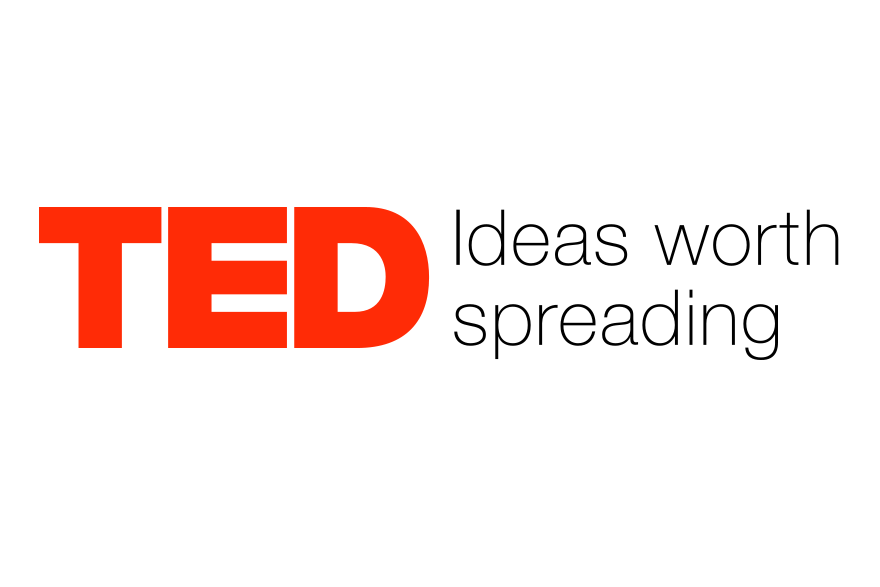

### **1. Features in dataset**



*   **Features** mentioned in the dataset :

1. **talk_id:** Talk identification number provided by TED
2. **title:** Title of the talk
3. **speaker_1:** First speaker in TED's speaker list
4. **all_speakers:** Speakers in the talk
5. **occupations:** Occupations of the speakers
6. **about_speakers:** Blurb about each speaker
7. **recorded_date:** Date the talk was recorded
8. **published_date:** Date the talk was published to TED.com
9. **event:** Event or medium in which the talk was given
10. **native_lang:** Language the talk was given in
11. **available_lang:** All available languages (lang_code) for a talk
12. **comments:** Count of comments
13. **duration:** Duration in seconds
14. **topics:** Related tags or topics for the talk
15. **related_talks:** Related talks (key='talk_id',value='title')
16. **url:** URL of the talk
17. **description:** Description of the talk
18. **transcript:** Full transcript of the talk



### **2. Importing Libraries**

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import ast
from datetime import datetime

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler




### **3. Data Understanding**

In [264]:
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Projects/Regression/Copy of data_ted_talks.csv")

In [265]:
ted_df = df.copy()

In [266]:
ted_df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [267]:
ted_df.shape

(4005, 19)

* No. of instances  = 4005
* No. of variables = 19
* Target variable = 'views'

In [268]:
ted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [269]:
ted_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
talk_id,4005.0,NaN,NaN,NaN,12432.538327,17447.576262,1.0,1252.0,2333.0,23777.0,62794.0
title,4005,4005,Averting the climate crisis,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speaker_1,4005,3274,Alex Gendler,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
all_speakers,4001,3306,{0: 'Alex Gendler'},34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupations,3483,2049,{0: ['writer']},53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
about_speakers,3502,2977,{0: 'Alex Rosenthal takes everyday experiences...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views,4005.0,NaN,NaN,NaN,2148005.573783,3451225.523659,0.0,882069.0,1375508.0,2133110.0,65051954.0
recorded_date,4004,1334,2017-04-24,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
published_date,4005,2962,2017-09-07,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event,4005,459,TED-Ed,556,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [270]:
ted_df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [271]:
ted_df.describe(percentiles = [.25, .50, .75, .99]).T

,count,mean,std,min,25%,50%,75%,99%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,60751.60,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,16299833.68,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,1038.73,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,1601.12,3922.0


In [272]:
ted_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

### **4. EDA**

*Exploring the data based on certain criteria & its outcome on TED events*

* Views

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'Views')

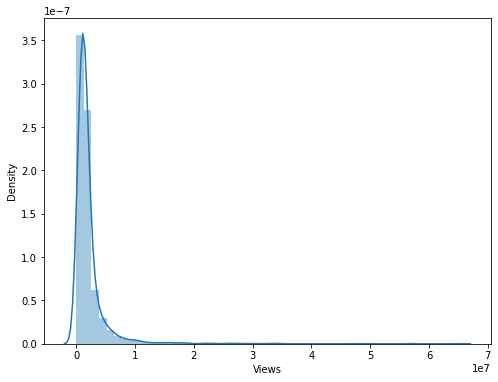

In [273]:
plt.figure(figsize=(8,6))
sns.distplot((ted_df['views']))
plt.xlabel('Views')

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'Views')

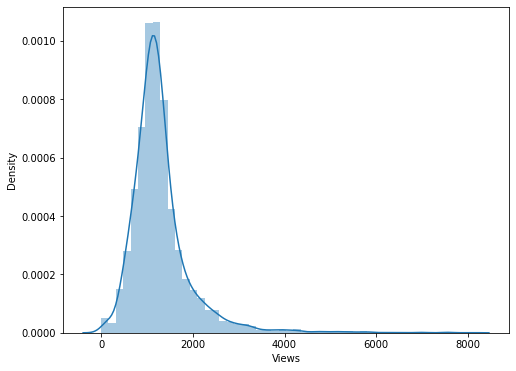

In [274]:
# decreasing skewness by using sqrt transformation
plt.figure(figsize=(8,6))
sns.distplot(np.sqrt(ted_df['views']))          
plt.xlabel('Views')

In [275]:
ted_df['views'].describe()

count    4.005000e+03
mean     2.148006e+06
std      3.451226e+06
min      0.000000e+00
25%      8.820690e+05
50%      1.375508e+06
75%      2.133110e+06
max      6.505195e+07
Name: views, dtype: float64

*The average views garned by TED events is 2.14 million and median is 1.37 million. This suggests a very high popularity of TED events*

* Duration

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'Duration')

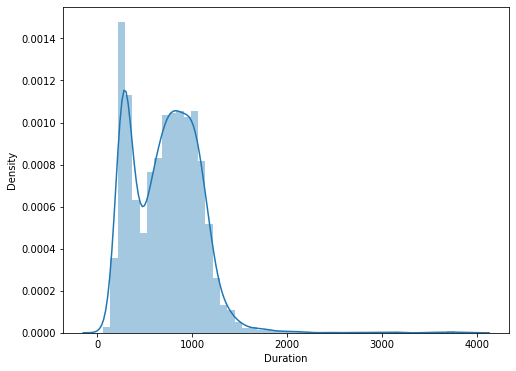

In [276]:
plt.figure(figsize=(8,6))
sns.distplot((ted_df['duration']))
plt.xlabel('Duration')

In [277]:
ted_df['duration'].describe()

count    4005.000000
mean      724.011236
std       361.775462
min        60.000000
25%       393.000000
50%       738.000000
75%       974.000000
max      3922.000000
Name: duration, dtype: float64

*The average duration for TED events is around 714 seconds which is 11 minutes, whereas majority of TED events have time-duration of 960 seconds which approximates to around 15 minutes which is a very good time distribution*

* Comments

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'Comments')

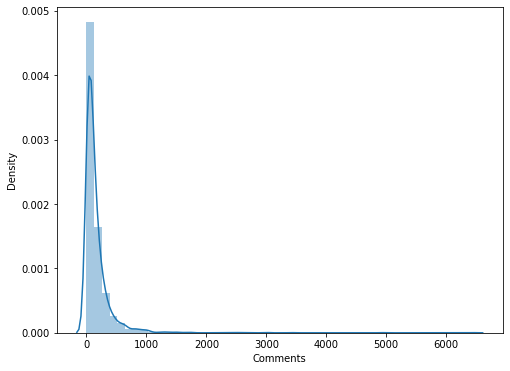

In [278]:
plt.figure(figsize=(8,6))
sns.distplot((ted_df['comments']))
plt.xlabel('Comments')

In [279]:
ted_df['comments'].describe()

count    3350.000000
mean      161.997015
std       268.838922
min         0.000000
25%        38.000000
50%        89.000000
75%       188.000000
max      6449.000000
Name: comments, dtype: float64

*TED events receive an average of 90 comments and median is 68 which is very less considering the popularity of the TED events. While the maximum count of comments received are greater than 135*

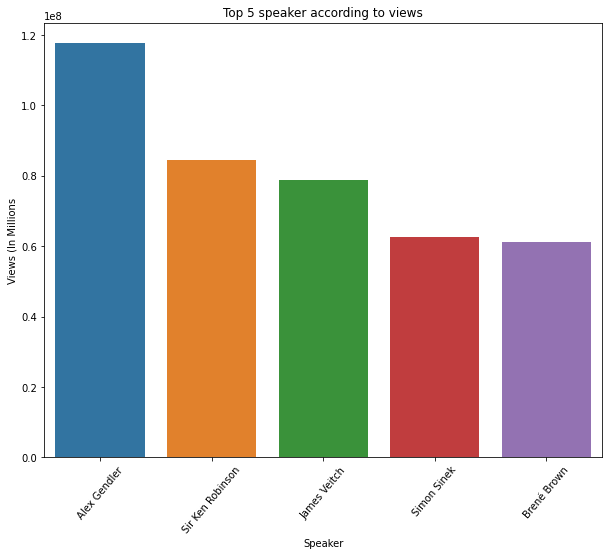

In [280]:
#top 5 speakers
temp=ted_df.groupby(['speaker_1'],as_index=False)['views'].sum().sort_values('views',ascending=False)[:5]
plt.figure(figsize=(10,8)) 
ax=sns.barplot(x='speaker_1', y='views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=50);
plt.title('Top 5 speaker according to views')
plt.xlabel('Speaker')
plt.ylabel('Views (In Millions')
ax.grid(False)

In [281]:
# Speaker with most talks
speaker_count = ted_df['speaker_1'].value_counts()
speaker_count

Alex Gendler        34
Iseult Gillespie    19
Emma Bryce          12
Daniel Finkel       11
Alex Rosenthal      10
                    ..
Peter van Manen      1
 Beardyman           1
Daniel H. Cohen      1
Jinsop Lee           1
Cella Wright         1
Name: speaker_1, Length: 3274, dtype: int64

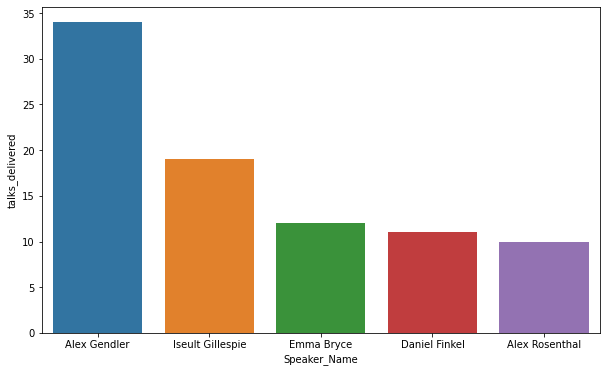

In [282]:
# Speaker vs. talks delivered:
speaker_count = ted_df['speaker_1'].value_counts()
speaker_count = pd.DataFrame(speaker_count).reset_index()
speaker_count.columns = ['Speaker_Name', 'talks_delivered']
most_talks = speaker_count.nlargest(5, 'talks_delivered')
plt.figure(figsize=(10,6))
sns.barplot(x = 'Speaker_Name', y = 'talks_delivered', data = most_talks)

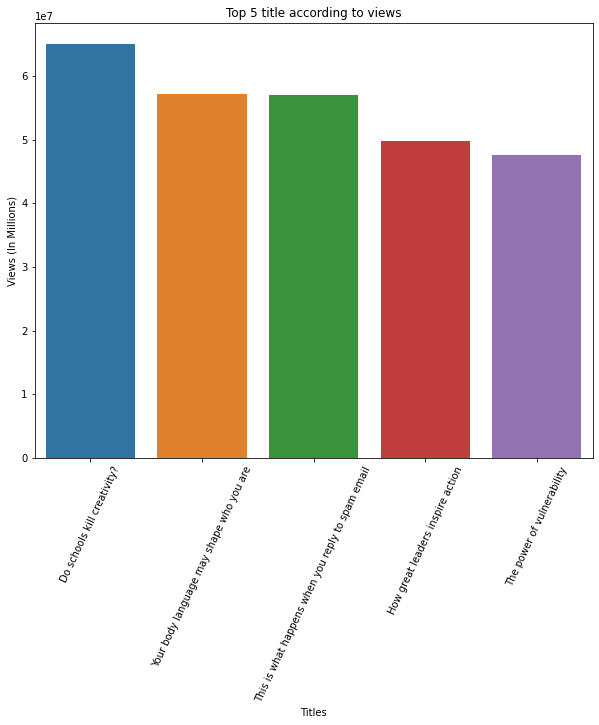

In [283]:
# Top titles 
temp=ted_df.groupby(['title'],as_index=False)['views'].sum().sort_values('views',ascending=False)[:5]
plt.figure(figsize=(10,8)) 
ax=sns.barplot(x='title', y='views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=65);
plt.title('Top 5 title according to views')
plt.xlabel('Titles')
plt.ylabel('Views (In Millions)')
ax.grid(False)

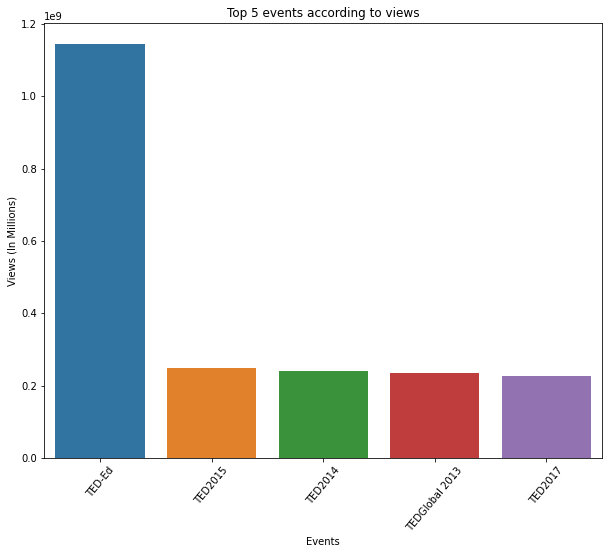

In [284]:
# Top 5 events wrt views
temp=ted_df.groupby(['event'],as_index=False)['views'].sum().sort_values('views',ascending=False)[:5]
plt.figure(figsize=(10,8)) 
ax=sns.barplot(x='event', y='views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=50);
plt.title('Top 5 events according to views')
plt.xlabel('Events')
plt.ylabel('Views (In Millions)')
ax.grid(False)

Text(0, 0.5, 'Views (In Millions)')

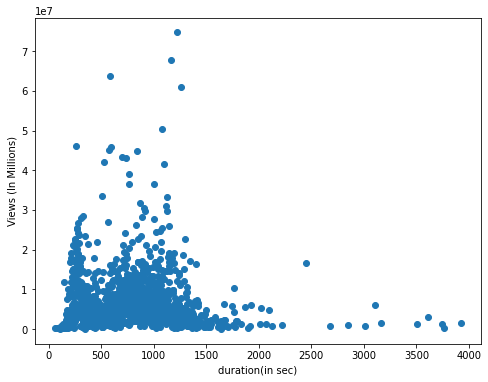

In [285]:
temp=ted_df.groupby(['duration'],as_index=False)['views'].sum().sort_values('views',ascending=False)
plt.figure(figsize=(8,6)) 
ax= plt.scatter(x='duration', y='views',data=temp)
plt.xlabel('duration(in sec)')
plt.ylabel('Views (In Millions)')

*It can be seen that the duration plot is heavily influenced by outliers , and the relationship between duration and views is not linear*

### **5. Data Cleaning**

In [286]:
# checking for duplicate rows
ted_df.duplicated().sum()

0

In [287]:
# Handling null values
ted_df['occupations'].fillna('NA', inplace=True)
ted_df['about_speakers'].fillna( 'NA' , inplace =True)
ted_df['comments'].fillna(0, inplace =True)
ted_df['all_speakers'].fillna( 'NA' , inplace =True)

In [288]:
ted_df.isnull().any()       # except 1 recorded date all null values are handled 

talk_id           False
title             False
speaker_1         False
all_speakers      False
occupations       False
about_speakers    False
views             False
recorded_date      True
published_date    False
event             False
native_lang       False
available_lang    False
comments          False
duration          False
topics            False
related_talks     False
url               False
description       False
transcript        False
dtype: bool

In [289]:
# removing infinite values
ted_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [290]:
ted_df.shape

(4005, 19)

### **6. Feature Engineering**

*Creating new features relevant to Machine Learning algorithms that can help in better prediction*

#### 6.1. Grouping Events

*Grouping events based on decades and uniqe suffixes to reduce complexity*

In [291]:
ted_df['event'].value_counts()

TED-Ed               556
TED2018               96
TED2017               96
TED2019               91
TED2014               84
                    ... 
TEDxBG                 1
TEDxToulouse           1
TEDxGroningen          1
TEDxNorthwesternU      1
TEDxUMKC               1
Name: event, Length: 459, dtype: int64

In [292]:
#grouping mulltiple events into single main event
ted_df['Event_Category'] = 'Others'
for i in range(len(df)):
    if ted_df['event'][i][0:5]=='TED20':
        ted_df['Event_Category'][i] = 'TED2000s'
    elif ted_df['event'][i][0:5]=='TED19':
        ted_df['Event_Category'][i] = 'TED1900s'
    elif ted_df['event'][i][0:4]=='TEDx':
        ted_df['Event_Category'][i] = "TEDx"
    elif ted_df['event'][i][0:4]=='TED@':
        ted_df['Event_Category'][i] = "TED@"
    elif ted_df['event'][i][0:8]=='TEDSalon':
        ted_df['Event_Category'][i] = "TEDSalon"
    elif ted_df['event'][i][0:6]=='TED-Ed':
        ted_df['Event_Category'][i] = 'TED-Ed'
    elif ted_df['event'][i][0:8]=='TEDWomen':
        ted_df['Event_Category'][i] = 'TEDWomen'
    elif ted_df['event'][i][0:6]=='TEDMED':
        ted_df['Event_Category'][i] = 'TEDMED'
    elif ted_df['event'][i][0:3]=='TED':
        ted_df['Event_Category'][i] = 'TED_Other'


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [293]:
ted_df['Event_Category'].unique()

array(['TED2000s', 'TED_Other', 'TEDSalon', 'Others', 'TED1900s', 'TEDx',
       'TED@', 'TEDMED', 'TEDWomen', 'TED-Ed'], dtype=object)

In [294]:
ted_df['Event_Category'].value_counts()

TED2000s     1178
TED_Other     865
TEDx          696
TED-Ed        561
TEDWomen      194
TED@          187
Others        144
TEDMED         92
TEDSalon       79
TED1900s        9
Name: Event_Category, dtype: int64

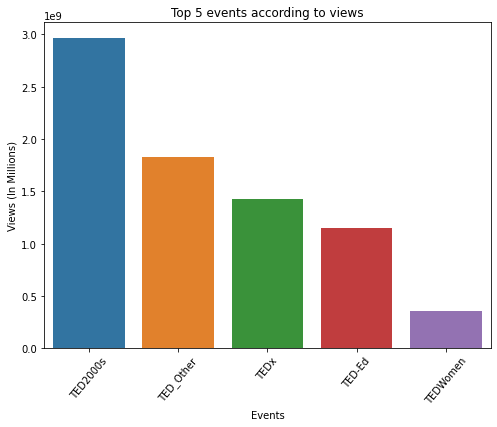

In [295]:
temp=ted_df.groupby(['Event_Category'],as_index=False)['views'].sum().sort_values('views',ascending=False)[:5]
plt.figure(figsize=(8,6)) 
ax=sns.barplot(x='Event_Category', y='views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=50);
plt.title('Top 5 events according to views')
plt.xlabel('Events')
plt.ylabel('Views (In Millions)')
ax.grid(False)

*When grouped together it can be seen that , TED events happened in 2000s are the most viewed followed by TED_Other which contains various small events organised by TED*

#### 6.2. Creating new features from recorded_date and published_date

*Creating new datetime features like date, month, year, day and time_since_published features for better understanding and evaluation of dataset*

In [296]:
ted_df['recorded_date'] = pd.to_datetime(ted_df['recorded_date'], format= "%Y-%m-%d")
ted_df['published_date'] = pd.to_datetime(ted_df['published_date'], format = "%Y-%m-%d")

* Last date of published event

In [297]:
last_date = ted_df['published_date'].max()
last_date

Timestamp('2020-04-30 00:00:00')

* First- date of published event

In [298]:
first_date = ted_df['published_date'].min()
first_date

Timestamp('2006-06-27 00:00:00')

* Converting into datetime 

In [299]:
ted_df['Day'] = ted_df['published_date'].dt.day_name()

In [300]:
ted_df['Month'] = ted_df['published_date'].dt.month_name()

In [301]:
ted_df["year"] = ted_df["published_date"].apply(lambda x: x.year)
ted_df["day_num"] = ted_df["published_date"].apply(lambda x: x.day)

In [302]:
ted_df['time_since_published'] = (last_date - ted_df['published_date']).apply(lambda x:x.days)

In [303]:
ted_df['daily_views'] = ted_df['views'] / (ted_df['time_since_published'])

In [304]:
ted_df.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,url,description,transcript,Event_Category,Day,Month,year,day_num,time_since_published,daily_views
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",TED2000s,Tuesday,June,2006,27,5056,696.873418
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,...,https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",TED2000s,Tuesday,June,2006,27,5056,2868.213014


In [305]:
ted_df.isnull().any()

talk_id                 False
title                   False
speaker_1               False
all_speakers            False
occupations             False
about_speakers          False
views                   False
recorded_date            True
published_date          False
event                   False
native_lang             False
available_lang          False
comments                False
duration                False
topics                  False
related_talks           False
url                     False
description             False
transcript              False
Event_Category          False
Day                     False
Month                   False
year                    False
day_num                 False
time_since_published    False
daily_views              True
dtype: bool

*Daily views column contains infinity and null values, which is due to zero views for that particular event. Hence we need to drop the rows containing null or infinity values*

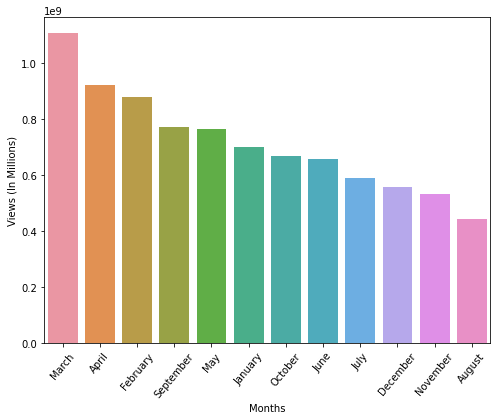

In [306]:
temp=ted_df.groupby(['Month'],as_index=False)['views'].sum().sort_values('views',ascending=False)
plt.figure(figsize=(8,6)) 
ax= sns.barplot(x='Month', y='views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=50);
plt.xlabel('Months')
plt.ylabel('Views (In Millions)')
ax.grid(False)

*It can be seen that March is the most popular month & August the least popular month as far as TED events are concerned*

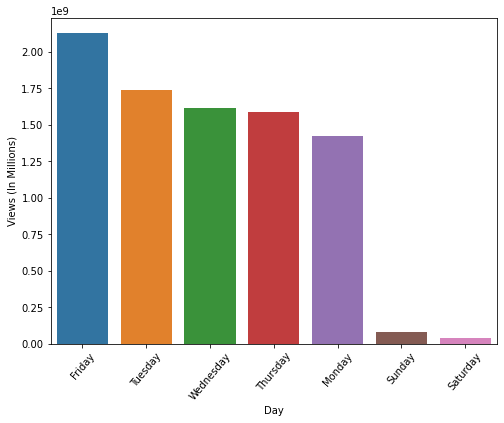

In [307]:
temp=ted_df.groupby(['Day'],as_index=False)['views'].sum().sort_values('views',ascending=False)
plt.figure(figsize=(8,6)) 
ax= sns.barplot(x='Day', y='views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=50);
plt.xlabel('Day')
plt.ylabel('Views (In Millions)')
ax.grid(False)

*Majority of the TED Events are published on Tuesday and , it is alo the day which receives the maximum views*

#### 6.3. Finding number of unique topics in dataset

In [308]:
temp = ted_df['topics'].iloc[1]
temp

"['Africa', 'Asia', 'Google', 'demo', 'economics', 'global issues', 'health', 'statistics', 'global development', 'visualizations', 'math']"

In [309]:
temp_eval = ast.literal_eval(temp)
temp_eval


['Africa',
 'Asia',
 'Google',
 'demo',
 'economics',
 'global issues',
 'health',
 'statistics',
 'global development',
 'visualizations',
 'math']

In [310]:
# finding number of topics in dataset
def get_num_topics(temp):

  temp_eval = ast.literal_eval(temp)
  num_topics = []
  for t in temp_eval:
    num_topics = len(temp_eval)
    
  return num_topics


ted_df['Num_of_Topics'] = ted_df['topics'].map(get_num_topics)

In [311]:
get_num_topics(temp)

11

In [312]:
ted_df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,description,transcript,Event_Category,Day,Month,year,day_num,time_since_published,daily_views,Num_of_Topics
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",TED2000s,Tuesday,June,2006,27,5056,696.873418,9
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",TED2000s,Tuesday,June,2006,27,5056,2868.213014,11
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",TED2000s,Tuesday,June,2006,27,5056,379.911392,9
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,TED2000s,Tuesday,June,2006,27,5056,526.912381,9
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,TED2000s,Tuesday,June,2006,27,5056,12866.288370,7


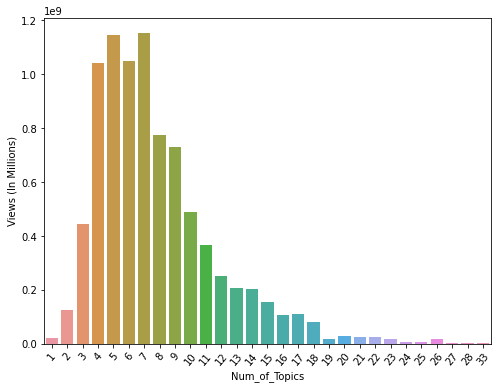

In [313]:
temp=ted_df.groupby(['Num_of_Topics'],as_index=False)['views'].sum().sort_values('views',ascending=False)
plt.figure(figsize=(8,6)) 
ax= sns.barplot(x='Num_of_Topics', y='views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=50);
plt.xlabel('Num_of_Topics')
plt.ylabel('Views (In Millions)')
ax.grid(False)

*It can be seen that maixmum views are generated when Num_of_Topics lie in the range of 4-7 , whereas views go on decreasing as Num_of_Topics go on increasing beyond that, which can be associated with the increase in time duration of an event also*

#### 6.4. Available Languages Count

In [314]:
ted_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'Event_Category',
       'Day', 'Month', 'year', 'day_num', 'time_since_published',
       'daily_views', 'Num_of_Topics'],
      dtype='object')

In [315]:
temp = ted_df['available_lang'][0]
temp

"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa', 'fr', 'fr-ca', 'gl', 'gu', 'he', 'hi', 'hr', 'hu', 'id', 'it', 'ja', 'ko', 'lt', 'lv', 'mk', 'nl', 'pl', 'pt', 'pt-br', 'ro', 'ru', 'sk', 'sl', 'sq', 'sr', 'sv', 'sw', 'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'zh-cn', 'zh-tw']"

In [316]:
temp_eval = ast.literal_eval(temp)
#temp_eval

In [317]:
# finding unique topics in dataset
def get_lanuages(temp):

  temp_eval = ast.literal_eval(temp)
  lang_count = []
  for t in temp_eval:
    lang_count = len(temp_eval)

    
  return lang_count



ted_df['Available_lang'] = ted_df['available_lang'].map(get_lanuages)

In [318]:
get_lanuages(temp)

43

In [319]:
ted_df.shape

(4005, 28)

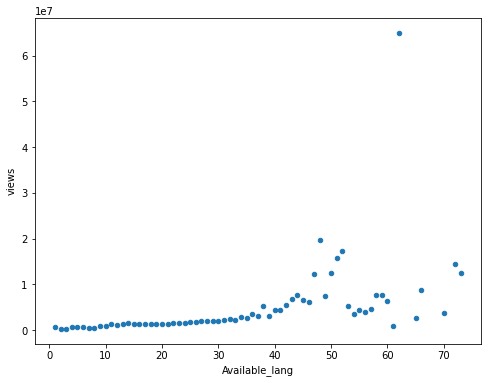

In [320]:
lang_views = ted_df.groupby('Available_lang')['views'].mean().astype(int).reset_index()
lang_views = lang_views.sort_values(by ='views', ascending = False)

lang_views.plot(x='Available_lang',
                 y='views',
                 kind='scatter',
                 figsize = (8, 6))

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


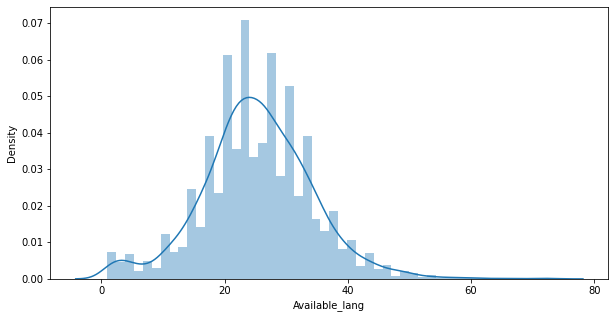

In [321]:
plt.figure(figsize=(10,5))
sns.distplot(ted_df['Available_lang'])

*On average a TED event is available in around 25 languages , which explains its wide reach and popularity*

* Speaker_1 average views

In [322]:
Speaker_avg_views = ted_df.groupby('speaker_1').agg({'views':'mean'}).sort_values(['views'], ascending=False)
Speaker_avg_views = Speaker_avg_views.to_dict()
Speaker_avg_views = Speaker_avg_views.values()
Speaker_avg_views = list(Speaker_avg_views)[0]
ted_df['Speaker_avg_views'] = ted_df['speaker_1'].map(Speaker_avg_views)

In [323]:
ted_df.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,Event_Category,Day,Month,year,day_num,time_since_published,daily_views,Num_of_Topics,Available_lang,Speaker_avg_views
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,TED2000s,Tuesday,June,2006,27,5056,696.873418,9,43,2190599.25
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,...,TED2000s,Tuesday,June,2006,27,5056,2868.213014,11,49,3987156.10


* Comments V/s views

In [324]:
ted_df.groupby(['comments'])['views'].mean().sort_values(ascending=False).reset_index()

,comments,views
0,4931.0,6.505195e+07
1,2633.0,5.707427e+07
2,2079.0,4.973058e+07
3,2209.0,4.754483e+07
4,559.0,3.797682e+07
...,...,...
596,4.0,6.499294e+05
597,838.0,6.093030e+05
598,560.0,5.368810e+05
599,3.0,5.213352e+05


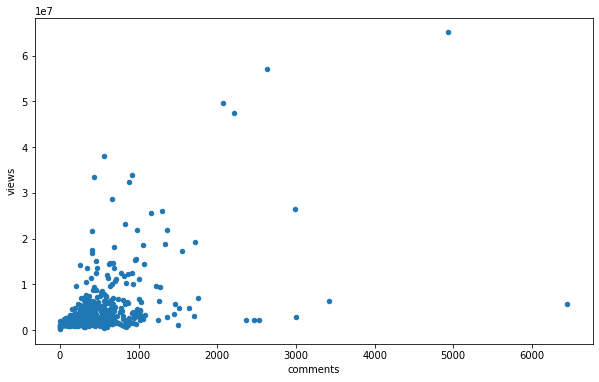

In [325]:
comments_views = ted_df.groupby('comments')['views'].mean().astype(int).reset_index()
comments_views = comments_views.sort_values(by ='views', ascending = False)

comments_views.plot(x='comments',
                 y='views',
                 kind='scatter',
                 figsize = (10, 6))

*There is a slight correlation between comments and views , but it is heavily influenced by outliers*

#### 6.5. Checking Correlation

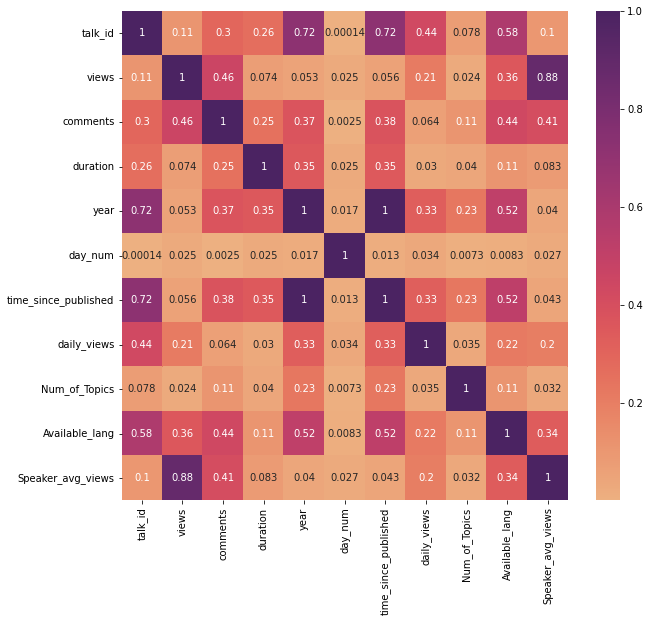

In [326]:
# Checking Correlation using Heatmap
plt.figure(figsize = (10,9))
correlation = ted_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap = 'flare')

#### 6.6. Categorical & Numeric Features

In [327]:
categorical_features = ted_df.describe(include=['object','category']).columns

In [328]:
categorical_features

Index(['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers',
       'event', 'native_lang', 'available_lang', 'topics', 'related_talks',
       'url', 'description', 'transcript', 'Event_Category', 'Day', 'Month'],
      dtype='object')

In [329]:
numeric_features = ted_df.describe().columns
numeric_features

Index(['talk_id', 'views', 'comments', 'duration', 'year', 'day_num',
       'time_since_published', 'daily_views', 'Num_of_Topics',
       'Available_lang', 'Speaker_avg_views'],
      dtype='object')

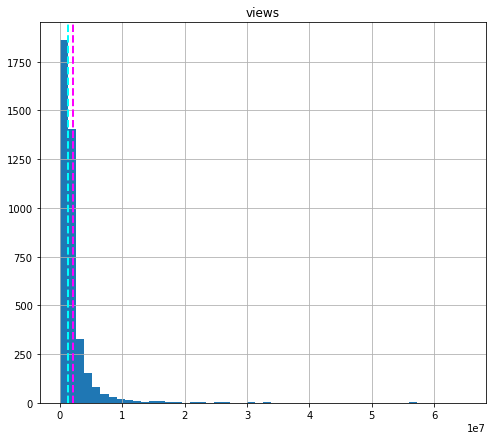

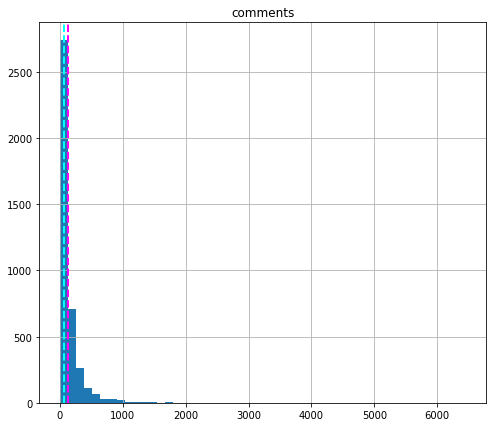

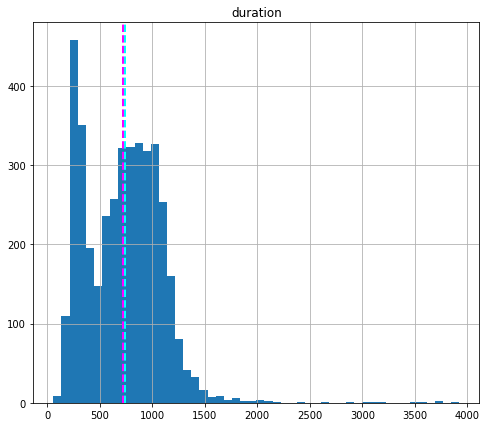

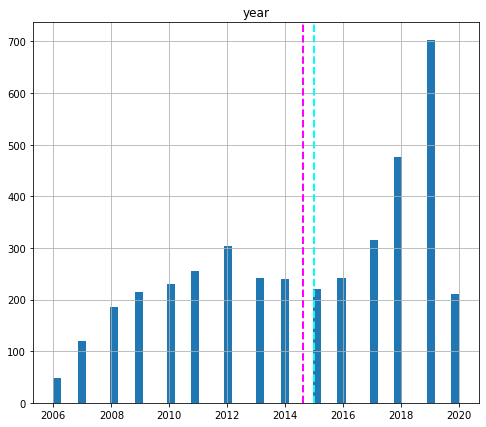

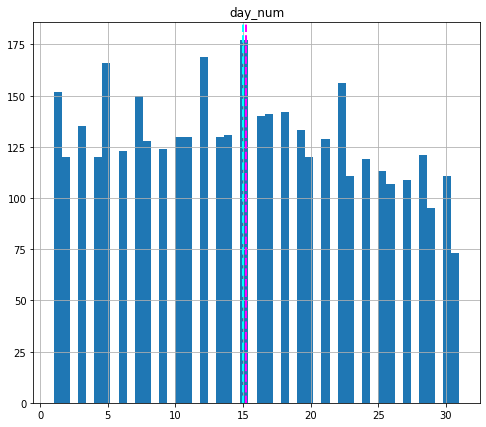

In [330]:
# plot a bar graph for each numeric feature count

for col in numeric_features[1:6]:
  fig = plt.figure(figsize=(8,7))
  ax = fig.gca()              # gca --> Get Current Axis 
  # applying graphical features to dataset  
  feature = ted_df[col]
  feature.hist(bins=50, ax=ax)
  # applying mean, median lines to graph
  ax.axvline(feature.mean(), color='magenta', linestyle = 'dashed', linewidth=2)       
  ax.axvline(feature.median(), color='cyan', linestyle = 'dashed', linewidth=2)  
  # set title
  ax.set_title(col)
plt.show()

#### 6.7. Outlier Treatment

In [331]:
# Percentiles
percentile_q1 = np.percentile(ted_df['duration'],25)
print(percentile_q1)
percentile_q2 = np.percentile(ted_df['duration'],50)
print(percentile_q2)
percentile_q3 = np.percentile(ted_df['duration'],75)
print(percentile_q3)


393.0
738.0
974.0


In [332]:
# IQ range
iqr_duration =  percentile_q3 - percentile_q1
print(iqr_duration)

581.0


In [333]:
ted_df['duration']= ted_df['duration'].mask(ted_df['duration']>(ted_df['duration'].quantile(0.75)+1.5* iqr_duration), ted_df['duration'].mean())

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


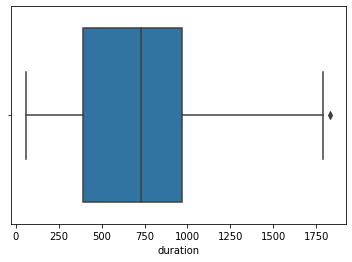

In [334]:
sns.boxplot(ted_df['duration'], data= ted_df)

In [335]:
# Comments
iqr_comments = np.percentile(ted_df['comments'], 75) - np.percentile(ted_df['comments'],25)
print(iqr_comments)

145.0


In [336]:
ted_df['comments']= ted_df['comments'].mask(ted_df['comments']>(ted_df['comments'].quantile(0.75)+1.5*iqr_comments), ted_df['comments'].mean())

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


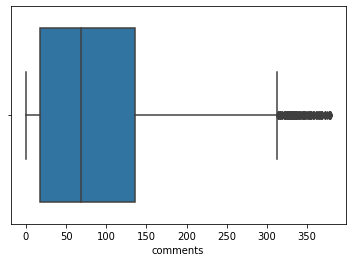

In [337]:
sns.boxplot(ted_df['comments'], data= ted_df)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


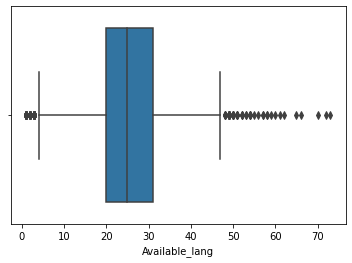

In [338]:
# Available languages
sns.boxplot(ted_df['Available_lang'], data=ted_df)

In [339]:
iqr_lang = np.percentile(ted_df['Available_lang'], 75) - np.percentile(ted_df['Available_lang'],25)
print(iqr_lang)

11.0


In [340]:
ted_df['Available_lang']= ted_df['Available_lang'].mask(ted_df['Available_lang']>(ted_df['Available_lang'].quantile(0.75)+1.5* iqr_lang), ted_df['Available_lang'].mean())

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


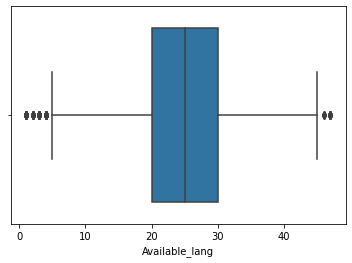

In [341]:
sns.boxplot(ted_df['Available_lang'], data=ted_df)

### **7. One Hot Encoding**

In [342]:
ted_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'Event_Category',
       'Day', 'Month', 'year', 'day_num', 'time_since_published',
       'daily_views', 'Num_of_Topics', 'Available_lang', 'Speaker_avg_views'],
      dtype='object')

In [343]:
pair_df = [ted_df[['duration', 'comments', 'Available_lang', 'Num_of_Topics', 'daily_views', 'Speaker_avg_views', 'time_since_published', ]], 
              pd.get_dummies(ted_df[['Day','year', 'Month', 'day_num', 'Event_Category']], drop_first =False),
              ted_df['views'] ]
one_hot_df = pd.concat(pair_df, axis=1)
one_hot_df.head(2)

,duration,comments,Available_lang,Num_of_Topics,daily_views,Speaker_avg_views,time_since_published,year,day_num,Day_Friday,...,Event_Category_TED-Ed,Event_Category_TED1900s,Event_Category_TED2000s,Event_Category_TED@,Event_Category_TEDMED,Event_Category_TEDSalon,Event_Category_TEDWomen,Event_Category_TED_Other,Event_Category_TEDx,views
0,977.0,272.000000,43.00000,9,696.873418,2190599.25,5056,2006,27,0,...,0,0,1,0,0,0,0,0,0,3523392
1,1190.0,135.503121,25.30412,11,2868.213014,3987156.10,5056,2006,27,0,...,0,0,1,0,0,0,0,0,0,14501685


### **8. Implementing Machine Learning Algorithms**

*Removing infinity and null values from dataset*

In [344]:
one_hot_df.dropna(inplace=True)

In [345]:
one_hot_df.replace([np.inf, -np.inf], 1, inplace=True)

In [346]:
features = [i for i in one_hot_df.columns if i not in ['views']]        # dataset for ML model

In [347]:
len(features)

38

#### **8.1. Linear Regression Algorithm**

In [348]:
# sorting data 
X = one_hot_df[features].apply(zscore)
y = (one_hot_df['views']).replace([np.inf, -np.inf], 0)

In [349]:
y.head()

0     3523392
1    14501685
2     1920832
3     2664069
4    65051954
Name: views, dtype: int64

In [350]:
X.shape,y.shape

((4004, 38), (4004,))

In [351]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.3, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(2802, 38)
(1202, 38)


In [352]:
# Instantiating Linear Model
lr = LinearRegression()

In [353]:
# fitting training data
lr.fit(X_train, y_train)

LinearRegression()

In [354]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.77


In [355]:
lr.coef_

array([ 9.51574016e+04,  5.12101098e+03,  2.84422748e+05, -6.69996108e+03,
        1.87465845e+05,  2.87651609e+06,  2.98218643e+08,  3.00683867e+08,
        1.73821154e+06,  4.04257640e+04, -3.51801913e+04, -4.55520689e+03,
        1.39319137e+04, -2.77942478e+03,  1.65523204e+03, -8.48432016e+03,
       -4.19912497e+06,  2.70125549e+06,  9.13671765e+06, -7.79711779e+06,
       -9.09409260e+06,  1.32824181e+06, -2.86901261e+05, -6.14447903e+06,
       -2.05575191e+06,  8.07416871e+06,  6.82175458e+06,  5.02915205e+06,
       -1.90771283e+04, -7.75654570e+02, -4.10652346e+04,  4.98791115e+04,
        3.67743700e+02, -1.95162784e+04, -1.50393888e+04, -1.27681458e+04,
       -3.31788546e+04,  1.15336121e+04])

In [356]:
y_pred = lr.predict(X_test)

#### **Regression Evaluation Metrics**

We will assess our model performances on the basis of following metrics :
1. Mean Absolute Error (MAE)
2. Mean Squared Error (MSE)
3. Root Mean Squared Error (RMSE)
5. R2 score 
6. Adjusted R2 score

In [357]:
# Evaluation Metrics

MAE= mean_absolute_error((y_test),(y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test),(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAE : 534115.9604999408
MSE : 3257636496117.228
RMSE : 1804892.37798746


In [358]:
r2 = r2_score((y_test), (y_pred))
print("R2 :" ,r2)

R2 : 0.7661979812352482


In [359]:
n= X_test.shape[0]
k= X_test.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2 :", adj_r2_score)

Adjusted R2 : 0.7585587063314988


#### **8.2. Lasso Regularization**

In [360]:
lasso = Lasso(alpha=0.1).fit(X_train, y_train)              # 0.1 gives the least MSE and max r2
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


Training set score: 0.80
Test set score: 0.77
Number of features used: 38


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.042e+15, tolerance: 3.094e+12


In [361]:
y_pred_l = lasso.predict(X_test)

In [362]:
MSE  = mean_squared_error((y_test), (y_pred_l))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test),(y_pred_l))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_l))
print("R2 :" ,r2)

n= X_test.shape[0]
k= X_test.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2 :", adj_r2_score)

MSE : 3262598976343.0107
MAE : 527653.2865789294
RMSE : 1806266.5850707118
R2 : 0.7658418218245063
Adjusted R2 : 0.758190909725909


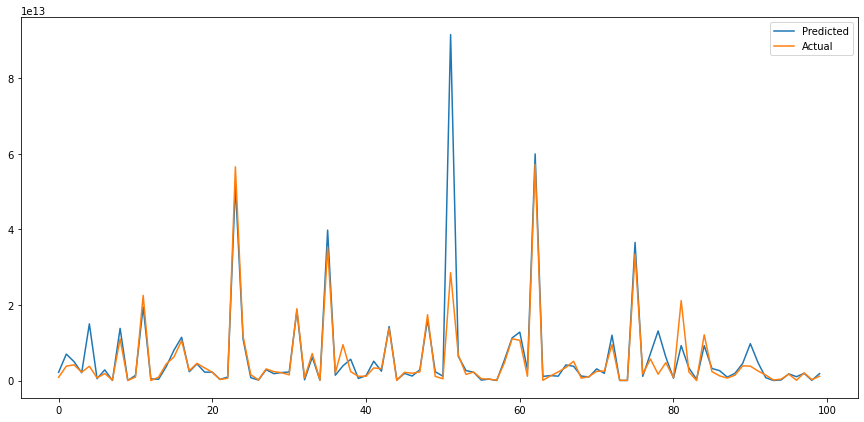

In [363]:
# Actual vs predicted values of dependent variables for 100 observation for better visualisation
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred_l[:100]))
plt.plot(np.square(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

 *Implementing Cross-Validation Procedure for Lasso*

In [364]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.804e+15, tolerance: 1.835e+12
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.514e+15, tolerance: 2.342e+12
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.319e+15, tolerance: 2.514e+12
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.606e+15, tolerance: 2.591e+12
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.804e+15, tolerance: 1.835e+12
Objective did n

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [365]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -2365868044637.207


In [366]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [367]:
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test),(y_pred_lasso))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_lasso))
print("R2 :" ,r2)

n= X_test.shape[0]
k= X_test.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2 :", adj_r2_score)

MSE : 3262453028593.5776
MAE : 527427.6543784308
RMSE : 1806226.1842287576
R2 : 0.7658522965593308
Adjusted R2 : 0.7582017267134621


#### **8.3. Ridge-Regression**

In [368]:
ridge = Ridge(alpha=0.05).fit(X_train, y_train)      # 0..5 gives the least MSE and max r2
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))


Training set score: 0.80
Test set score: 0.77


In [369]:
y_pred_r = ridge.predict(X_test)

In [370]:
MSE  = mean_squared_error((y_test), (y_pred_r))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_pred_r))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_r))
print("R2 :" ,r2)

n= X_test.shape[0]
k= X_test.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2 :", adj_r2_score)

MSE : 3262612579112.0684
MAE : 527658.9615764798
RMSE : 1806270.350504616
R2 : 0.765840845547727
Adjusted R2 : 0.7581899015501463


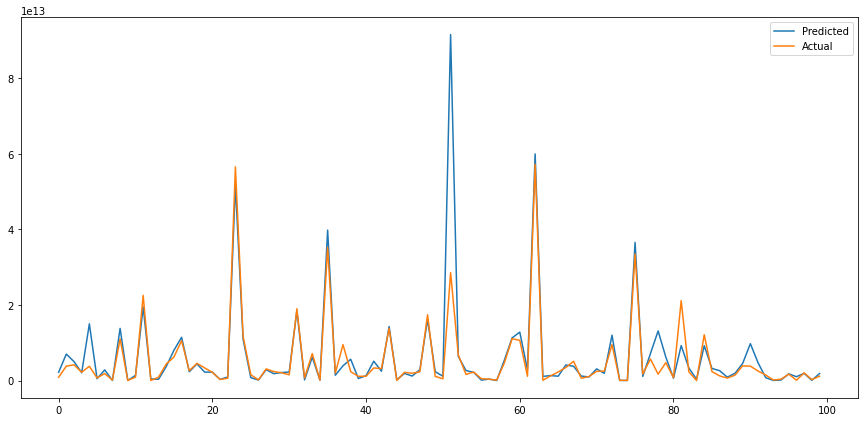

In [371]:
# Actual vs predicted values of dependent variables for 100 observation for better visualisation
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred_r[:100]))
plt.plot(np.square(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

*Implementing Cross-Validation Procedure for Ridge*

In [372]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

Ill-conditioned matrix (rcond=6.00227e-18): result may not be accurate.


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [373]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -2438882574322.8184


In [374]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [375]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)

n= X_test.shape[0]
k= X_test.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2 :", adj_r2_score)

MSE : 3258105791684.378
RMSE : 1805022.3798292303
R2 : 0.7661642996838756
Adjusted R2 : 0.75852392426512


#### **8.4. Elastic-Net Regression**

In [376]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [377]:
print("Training set score: {:.2f}".format(elasticnet.score(X_train, y_train)))
print("Test set score: {:.2f}".format(elasticnet.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.76


In [378]:
y_pred_e = elasticnet.predict(X_test)

In [379]:
MSE  = mean_squared_error((y_test),(y_pred_e))
print("MSE :" , MSE)

MAE = mean_absolute_error(y_test, y_pred_e)
print("MAE :", MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_e))
print("R2 :" ,r2)

n= X_test.shape[0]
k= X_test.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2 :", adj_r2_score)

MSE : 3350380708142.7373
MAE : 543307.6037946494
RMSE : 1830404.5203568356
R2 : 0.7595416879299162
Adjusted R2 : 0.7516849245088816


*R2 score for Elastic-Net regression is lesser  than Ridge & Lasso ,this is because Elastic regression generally works well on big datasets*

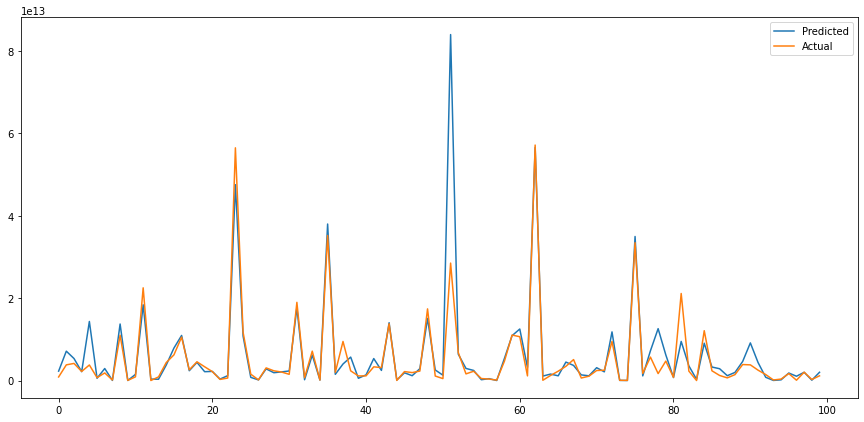

In [380]:
# Actual vs predicted values of dependent variables for 100 observation for better visualisation
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred_e[:100]))
plt.plot(np.square(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

#### **8.5. Decision Tree Regressor**

In [381]:
dtree = DecisionTreeRegressor( random_state = 0, max_depth = 25)        # max_depth = 25 --> gives least MSE and max r2 score in comparison to other values
parameters = {'n_estimators':[500],
            }

In [382]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=25, random_state=0)

In [383]:
print("Training set score: {:.3f}".format(dtree.score(X_train, y_train)))
print("Test set score: {:.3f}".format(dtree.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.744


In [384]:
y_pred_d = dtree.predict(X_test)

In [385]:
MSE  = mean_squared_error((y_test), (y_pred_d))
print("MSE :" , MSE)

MAE = mean_absolute_error(y_test, y_pred_d)
print("MAE", MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_d))
print("R2 :" ,r2)

n= X_test.shape[0]
k= X_test.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2 :", adj_r2_score)

MSE : 3564046896645.64
MAE 452243.01103001734
RMSE : 1887868.3472757416
R2 : 0.7442067706445497
Adjusted R2 : 0.7358489523165126


*From the training-score & test-score, it can be seen that model overfits*

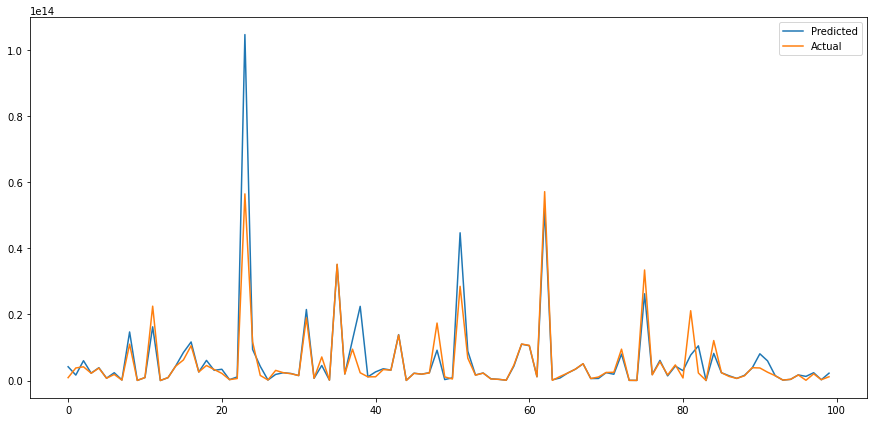

In [386]:
# Actual vs predicted values of dependent variables for 100 observation for better visualisation
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred_d[:100]))
plt.plot(np.square(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

#### **8.6. Bagging Regression Algorithm**

In [387]:
bagging = BaggingRegressor(random_state=0)
bagging.fit(X_train, y_train)


BaggingRegressor(random_state=0)

In [388]:
print("Training set score: {:.2f}".format(bagging.score(X_train, y_train)))
print("Test set score: {:.2f}".format(bagging.score(X_test, y_test)))

Training set score: 0.96
Test set score: 0.77


In [389]:
y_pred_bag = bagging.predict(X_test)

In [390]:
MSE  = mean_squared_error((y_test),(y_pred_bag))
print("MSE :" , MSE)

MAE = mean_absolute_error(y_test, y_pred_bag)
print("MAE :", MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_bag))
print("R2 :" ,r2)

n= X_test.shape[0]
k= X_test.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2 :", adj_r2_score)

MSE : 3188789426021.6924
MAE : 411220.2836938436
RMSE : 1785718.1821389657
R2 : 0.7711391660462484
Adjusted R2 : 0.7636613400013279


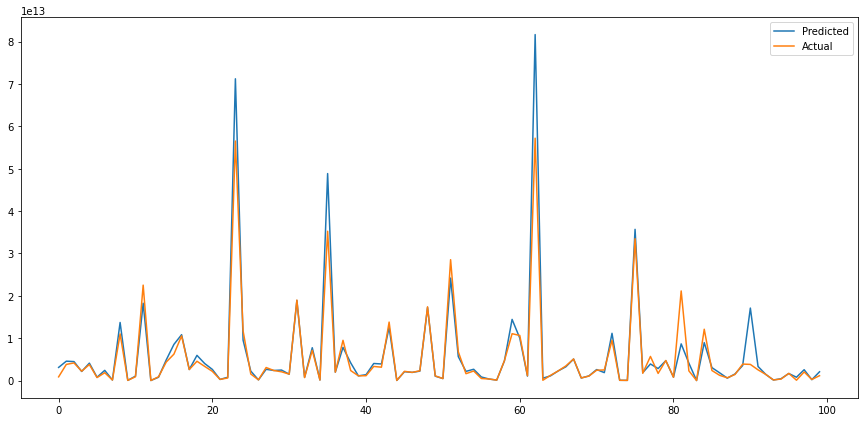

In [391]:
# Actual vs predicted values of dependent variables for 100 observation for better visualisation
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred_bag[:100]))
plt.plot(np.square(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

#### **8.7. Random Forest regressor**

In [392]:
# fitting into regressor
rfr = RandomForestRegressor(random_state=0)

In [393]:
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [394]:
print("Training set score: {:.2f}".format(rfr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rfr.score(X_test, y_test)))

Training set score: 0.97
Test set score: 0.80


In [395]:
y_pred_rfr = rfr.predict(X_test)

In [396]:
MSE  = mean_squared_error((y_test),(y_pred_rfr))
print("MSE :" , MSE)

MAE = mean_absolute_error(y_test, y_pred_rfr)
print("MAE :", MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_rfr))
print("R2 :" ,r2)

n= X_test.shape[0]
k= X_test.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2 :", adj_r2_score)

MSE : 2821988674662.5444
MAE : 364205.244093178
RMSE : 1679877.5772842926
R2 : 0.797464618948809
Adjusted R2 : 0.7908469538757693


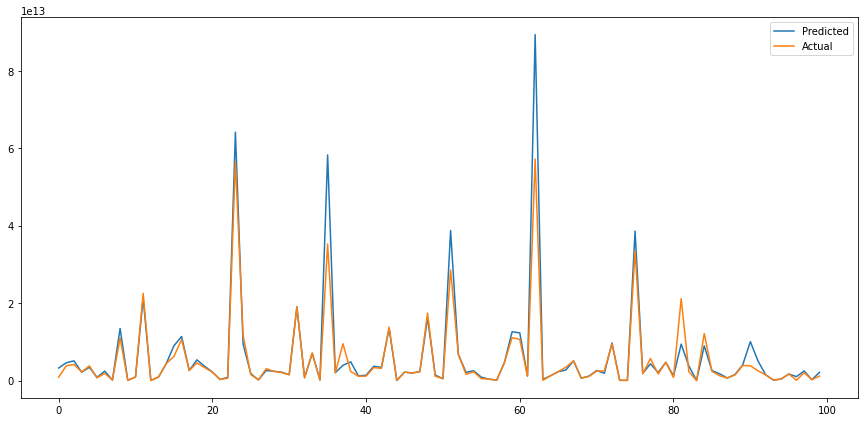

In [397]:
# Actual vs predicted values of dependent variables for 100 observation for better visualisation
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred_rfr[:100]))
plt.plot(np.square(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

#### **8.8. Gradient Boosting Regressor**

In [398]:
# Gradient Boosting model
GradientBoosting = GradientBoostingRegressor(random_state=0)

In [399]:
GradientBoosting.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [400]:
print("Training set score: {:.2f}".format(GradientBoosting.score(X_train, y_train)))
print("Test set score: {:.2f}".format(GradientBoosting.score(X_test, y_test)))

Training set score: 0.99
Test set score: 0.76


In [401]:
# Predictions on data
y_pred_gb = GradientBoosting.predict(X_test)

In [402]:
MSE  = mean_squared_error((y_test), (y_pred_gb))
print("MSE :" , MSE)

MAE =mean_absolute_error(y_test, y_pred_gb)
print("MAE :", MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_gb))
print("R2 :" ,r2)

n= X_test.shape[0]
k= X_test.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2 :", adj_r2_score)

MSE : 3330688345604.1885
MAE : 389178.3560468185
RMSE : 1825017.3548775334
R2 : 0.7609550175390508
Adjusted R2 : 0.7531444334173689


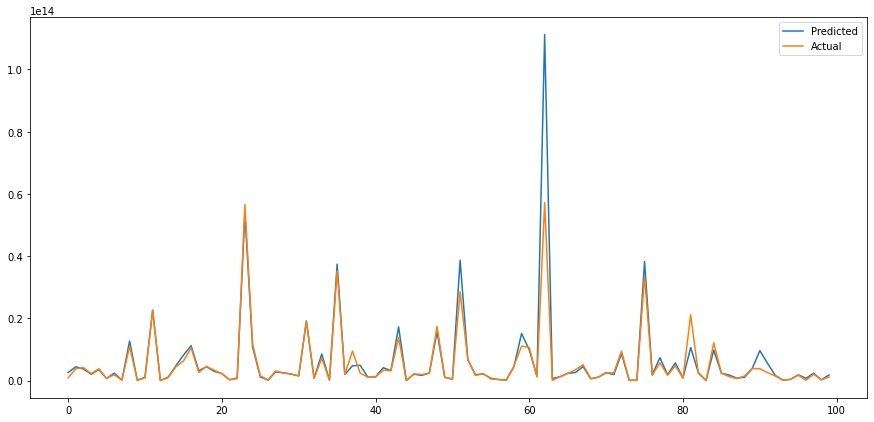

In [403]:
# Actual vs predicted values of dependent variables for 100 observation for better visualisation
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred_gb[:100]))
plt.plot(np.square(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

#### **8.8. XG-Boost Regressor Agorithm**

In [404]:
# XH+G model
xg_boost = XGBRegressor(random_state=0)


In [405]:
# Fitting the model

xg_boost.fit(X_train,y_train)

[11:26:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [406]:
print("Training set score: {:.2f}".format(xg_boost.score(X_train, y_train)))
print("Test set score: {:.2f}".format(xg_boost.score(X_test, y_test)))

Training set score: 0.98
Test set score: 0.78


In [407]:
# Prediction on test data
y_pred_xgb = xg_boost.predict(X_test)

In [408]:
MSE  = mean_squared_error((y_test),(y_pred_xgb))
print("MSE :" , MSE)

MAE = mean_absolute_error(y_test, y_pred_xgb)
print("MAE", MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_xgb))
print("R2 :" ,r2)

n= X_test.shape[0]
k= X_test.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2 :", adj_r2_score)

MSE : 3090058180060.5547
MAE 378958.6196150946
RMSE : 1757856.1317868293
R2 : 0.7782251514373092
Adjusted R2 : 0.7709788537198696


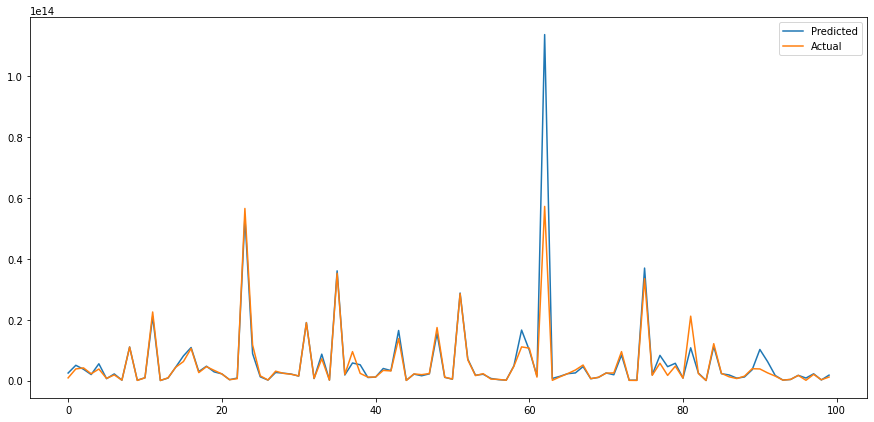

In [409]:
# Actual vs predicted values of dependent variables for 100 observation for better visualisation
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred_xgb[:100]))
plt.plot(np.square(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

#### **8.9. KNN Regressor Algorithm**

In [410]:
# Feature Scaling 
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_features = scaler.transform(X_train)

In [411]:
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

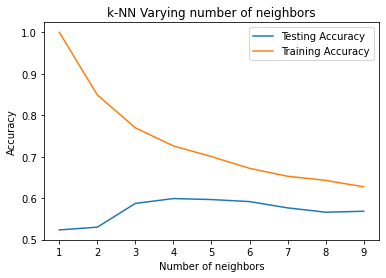

In [412]:
# Optimal value of k
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [413]:
knn_reg = KNeighborsRegressor(n_neighbors = 6)            # minkowski --> generalization of Eucledian & manhattan,  p= no of input variables
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [414]:
print("Training set score: {:.2f}".format(knn_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn_reg.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.59


In [415]:
y_pred_knn = knn_reg.predict(X_test)

In [416]:
MSE  = mean_squared_error(y_test,y_pred_knn)
print("MSE :" , MSE)

MAE = mean_absolute_error(y_test, y_pred_xgb)
print("MAE", MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_knn))
print("R2 :" ,r2)

n= X_test.shape[0]
k= X_test.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2 :", adj_r2_score)

MSE : 5687996436316.626
MAE 378958.6196150946
RMSE : 2384952.0826038886
R2 : 0.5917699684656021
Adjusted R2 : 0.5784314119752263


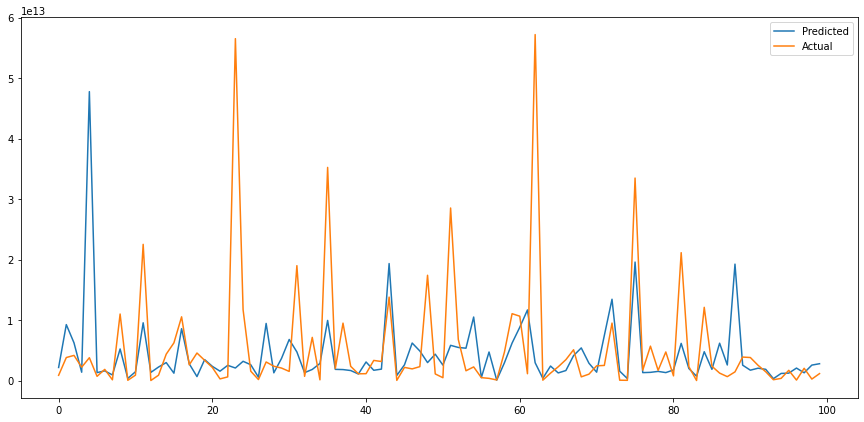

In [417]:
# Actual vs predicted values of dependent variables for 100 observation for better visualisation
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred_knn[:100]))
plt.plot(np.square(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

*High MSE, MAE & RMSE for knn can be due to the fact that KNN works best with lower dimensional data (less input variables)*

### **9. Model Explainability**

#### 9.1. SHAPLEY

In [418]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [419]:
# importing shap
import shap 

In [420]:
# Create the object that can calculate shap values
explainer = shap.Explainer(rfr)
# Calculate shap values
shap_values = explainer(X_train)

In [421]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0,:],X.iloc[0,:])

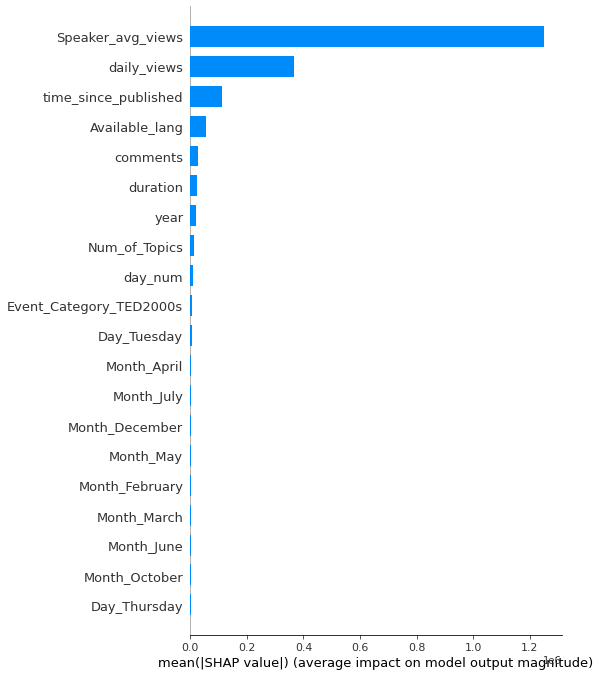

In [422]:
# Obtain a Bar Summary Plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

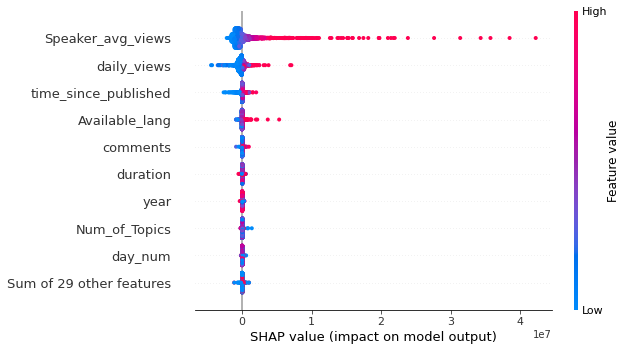

In [423]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

* The above plots shows top features & their contribution to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red and those pushing the prediction lower are in blue.
* So, *Daily_views* & *Speaker_avg_values* pushes the prediction lower, while *time_since_published* and *year* pushes the prediction higher.
* The base value (mean value) of our output is around 1 million views


### **10. Comparing All the Models**

In [424]:
#Defining all these models
models = [
           ['Lasso ', Lasso(alpha=0.1)],
           ['Ridge ', Ridge(alpha=0.05)],
           ['Elastic-Net ', ElasticNet(alpha=0.1, l1_ratio=0.5)],
           ['Bagging', BaggingRegressor(random_state=0)],
           ['RandomForest ',RandomForestRegressor(random_state=0)],
           ['Gradient-Boostiing ',GradientBoostingRegressor(random_state=0)], 
           ['XGB-Regressor', XGBRegressor(random_state=0)] ,
           ['KNN-Regressor', KNeighborsRegressor(n_neighbors = 6)]    
        ]


In [425]:
#Let's run all the models and store the scores
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 0
    curr_model_data["Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))

    model_data.append(curr_model_data)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.042e+15, tolerance: 3.094e+12


[11:30:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [426]:
#printing the results dataframe
results_df = pd.DataFrame(model_data)
results_df

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,Lasso,504494.495095,5.276533e+05,0.799069,0.765842,1.489507e+06,1.806267e+06
1,Ridge,504497.422735,5.276590e+05,0.799070,0.765841,1.489505e+06,1.806270e+06
2,Elastic-Net,520469.976185,5.433076e+05,0.797164,0.759542,1.496550e+06,1.830405e+06
3,Bagging,161113.937402,4.112203e+05,0.961571,0.771139,6.514045e+05,1.785718e+06
4,RandomForest,135977.619882,3.642052e+05,0.969284,0.797465,5.823742e+05,1.679878e+06
5,Gradient-Boostiing,200238.804153,3.891784e+05,0.985960,0.760955,3.937397e+05,1.825017e+06
6,XGB-Regressor,211980.922589,3.789586e+05,0.983605,0.778225,4.254706e+05,1.757856e+06
7,KNN-Regressor,904009.430347,1.070445e+06,0.671920,0.591770,1.903309e+06,2.384952e+06


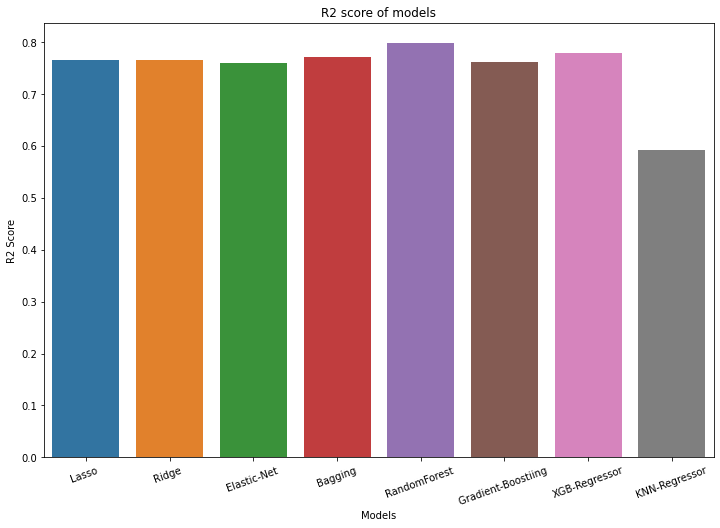

In [427]:
plt.figure(figsize=(12, 8))
ax=sns.barplot(x='Name', y='R2_Score_test',data=results_df)
plt.setp(ax.get_xticklabels(), rotation=20);
plt.title('R2 score of models')
plt.xlabel('Models')
plt.ylabel('R2 Score')
ax.grid(False)

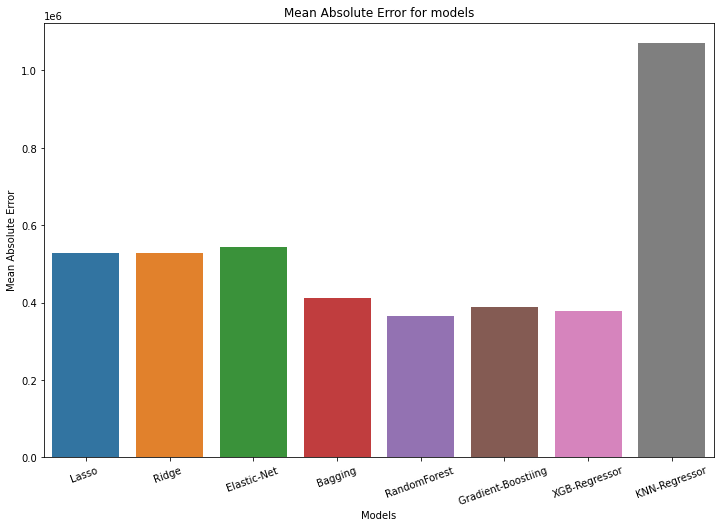

In [428]:
plt.figure(figsize=(12, 8))
ax=sns.barplot(x='Name', y='MAE_test',data=results_df)
plt.setp(ax.get_xticklabels(), rotation=20);
plt.title('Mean Absolute Error for models')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
ax.grid(False)

### **11. Summary & Conclusion**

* We trained 8 Machine Learning models on training dataset by considering the best parameters for each model.
* The performance of each model was evaluated using comparison graph between Predicted and Actual values and some Regression evaluation metrics.
* We started with Linear regression, and further implemented regularizations to the same.
* To further evaluate our dataset on more complex and restricted parameters , we used Decision Trees and its ensemble techniques.


Conclusion : 
* Bagging, Gradient-Boosting and XG-Boost have almost similar scores.
* Considering the Test_score XG-Boost gives better predictions with slightly low error than Gradient-Boosting.
* But, considering the overall optimal values from errors and R2 score, **Random-Forest** has least errors and optimal R2 score for training and test dataset.

In [429]:
# Mean value of Views
print(f'Mean value of our target variable is {y_pred_rfr.mean()}')      

Mean value of our target variable is 2174803.804359401
